# NATHANIEL MALLICK
## PROJECT 4
### ECE 1180

<h4><font color="red">IMPORTS</h4>

In [1]:


from vpython import *
from statistics import mean 
import matplotlib.pyplot as plt
import random 
import copy



<IPython.core.display.Javascript object>


<h2 align="center"> <font size="20pt">RANDOM WALK</font></h2>


<br><br>
<h4><font color="red">PLEASE RUN THE NEXT CELL - RANDOM WALK</font></h4>


In [116]:


class randomWalk:
    def __init__(self):
        self.totalSteps = 0
        self.size = vec(0.9,0.9,0.1)
        self.init_pos = vec(0,0,0)
        self.curr_pos = self.init_pos
        
        self.steps = [
                vec(-1,0,0), vec(-1,1,0), vec(0,1,0), vec(1,1,0),
                vec(1,0,0), vec(1,-1,0), vec(0,-1,0), vec(-1,-1,0)
        ]
        
    def move(self, visible=True):
        if visible:
            s = box(size=self.size, pos=self.curr_pos, color=color.white)
        
        self.curr_pos += random.choice(self.steps)
        self.totalSteps += 1
    
    def getSteps(self): 
        return self.totalSteps
    
    def getPosition(self):
        return self.curr_pos
    
    def restart(self): 
        self.curr_pos = self.init_pos
        self.totalSteps = 0 


### Visualisation 


In [117]:
scene = canvas()
walk = randomWalk()
limit = 1000 # limit for the number of steps taken 

while walk.getSteps() <= limit: 
    rate(40) # looping rate 
    walk.move(visible=True) # true makes vpython objects, false just computes the steps 

<IPython.core.display.Javascript object>

### Computation (no visualisation)

<IPython.core.display.Javascript object>

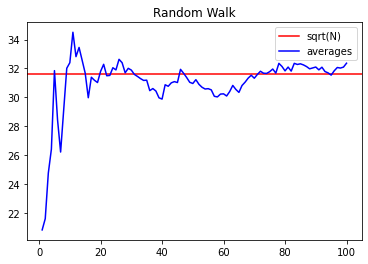

In [119]:
scene = canvas()
walk = randomWalk()
limit = 1000
dist = []

for i in range(100):     
    while walk.getSteps() <= limit: 
        walk.move(visible=False)
    
    dist.append(mag(walk.getPosition()))
    walk.restart()

## Data ##
x = [ (x+1) for x in range(100)]
means = [ mean(dist[0:i+1]) for i in range(100) ] # mean of distance magnitudes 

## Plotting ##
plt.title("Random Walk")
plt.axhline(y=sqrt(limit), color='r', linestyle='-', label="sqrt(N)")
plt.plot(x, means, 'b', label="averages")
plt.legend()
plt.show()


<h2 align="center"> <font size="20pt">CELULAR AUTONOMA 2D</font></h2>


<br><br>
<h4><font color="red">PLEASE RUN THE NEXT CELL - FOR 2D CELLULAR AUTONOMA</font></h4>


In [120]:
class cell: 
    def __init__(self, left=None, right=None, state=False, id=None): 
        ## Holds dead or alive state
        self.state = state
        self.nextState = state 
        
        ## Id for debugging
        self.id = id
        
        ## wanna-be pointers 
        self. rightNeighbor = None
        self.leftNeighbor = None
        
        if right != None and right.leftNeighbor == None: 
            self.rightNeighbor = right
            right.leftNeighbor = self 
            
        if left != None and left.rightNeighbor == None: 
            self.leftNeighbor = left
            left.rightNeighbor = self 

    ## Update the cells state ## 
    def update(self): 
        self.state = self.nextState
    
class autonoma: 
    def __init__(self, rule="00011110", length=32): 
        ## Cell vector
        self.cells = []
        self.row = 0 
        
        ## Create cells ##
        for i in range(length): 
            if i == length-1: 
                self.cells.append(cell(state=False, left=self.cells[i-1], right=self.cells[0], id=i))
            elif i > 0:
                self.cells.append(cell(state=False, left=self.cells[i-1], id=i))
            else: 
                self.cells.append(cell(state=False, id=i))
        
        ## Set the middle cell to be alive ##
        self.cells[int(len(self.cells)/2)].state = True  
        
        ## Rules defined by the input binary string ##
        self.rules = { 
            "000" : bool(int(rule[len(rule)-1])), 
            "001" : bool(int(rule[len(rule)-2])), 
            "010" : bool(int(rule[len(rule)-3])), 
            "011" : bool(int(rule[len(rule)-4])),
            "100" : bool(int(rule[len(rule)-5])),
            "101" : bool(int(rule[len(rule)-6])),
            "110" : bool(int(rule[len(rule)-7])),
            "111" : bool(int(rule[len(rule)-8]))
        }
    
    ## Update all of the next states according to the rules ##
    def updateNextStates(self): 
        for i in range(len(self.cells)): 
            self.cells[i].nextState = self.rules[
                str(int(self.cells[i].leftNeighbor.state)) +
                str(int(self.cells[i].state)) + 
                str(int(self.cells[i].rightNeighbor.state))
            ]

    ## Update VPYTHON visual ##
    def update(self): 
        self.updateNextStates()
        size = vec(1,1,0.1)
        for i in range(len(self.cells)): 
            if self.cells[i].state == True:
                s = box(pos=vec(i-int(len(self.cells)/2), -self.row, 0), size=size, color=color.white)
            else:
                s = box(pos=vec(i-int(len(self.cells)/2), -self.row, 0), size=size, color=color.black)
                s.visible = False
            self.cells[i].update()

        self.row+=1


## -------- Rule 30 -------- 


In [121]:
scene = canvas()
game = autonoma(rule="00011110") ## Rule 30 

while game.row < 16: 
    sleep(1)
    game.update()
    

<IPython.core.display.Javascript object>


## -------- Rule 126 -------- 


In [114]:
scene = canvas()
game = autonoma(rule="1111110") ## Rule 30 

while game.row < 16: 
    sleep(1)
    game.update()

<IPython.core.display.Javascript object>


## -------- Rule 158 -------- 


In [ ]:
scene = canvas()
game = autonoma(rule="10011110") ## Rule 158 

while game.row < 16: 
    sleep(1)
    game.update()


<h2 align="center"> <font size="20pt">GAME OF LIFE</font></h2>


<br><br>
<h4><font color="red">PLEASE RUN THE NEXT CELL - FOR THE GAME OF LIFE</font></h4>



In [2]:
class gameOfLife: 
    def __init__(self, N, scene): 
        
        ## Used to determine neighbors ##
        self._basis = {
            "top-left" : vec(-1,1,0), 
            "top" : vec(0,1,0), 
            "top-right" : vec(1,1,0),
            "left" : vec(-1,0,0), 
            "right" : vec(1,0,0), 
            "bottom-left" : vec(-1,-1,0),
            "bottom" : vec(0,-1,0), 
            "bottom-right" : vec(1,-1,0)
        }
        
        ## Loop limit ##
        self.size = N
        
        ## Define VPYTHON cell size ##
        self.cellSize = vec(0.9,0.9,0.1)
        
        ## Container to hold all cells ##
        self.cells = []
        
        ## Create grid ##
        for i in range(self.size):             
            for j in range(self.size): 
                ## create visualisation ## 
                s = box(pos=vec(i,j,0), size=self.cellSize, color=color.white, state=False, nextState=False)
                self.cells.append(s)
        
        ## Make a deep copy of the cells and shuffle them for the asynchronous aspect ##
        self.cell_copy = copy.deepcopy(self.cells)
        random.shuffle(self.cell_copy)
        
        ## Reads mouse clicks to choose initial state of cells ##
        while True:
            ev = scene.waitfor('mouseup mousedown')
            if ev.event == 'mousedown':
                loc = vec(round(ev.pos.x), round(ev.pos.y), 0)
                if loc.x in range(0, self.size, 1) and loc.y in range(0, self.size, 1):
                    cell = self.cells[int(loc.y) + int(loc.x)*self.size]
                    cell.state = not cell.state ## Toggle cell state 
                    if cell.state == True: 
                        cell.color = color.green 
                    else: 
                        cell.color = color.white 
                else:
                    break 
        
    def updateAsync(self): 
        
        extinction = True
        
        for c in self.cell_copy: 
            
            ## Hold the number of living neighbors ## 
            living_neighbors = 0   
            
            ## Checking all the neighbors states ##
            for key in self._basis:
                nb = c.pos + self._basis[key]   
                if self.cells[(int(nb.y)%self.size) + (int(nb.x)%self.size)*self.size].state == True: 
                    living_neighbors+=1 
                    
            cell = self.cells[int(c.pos.y) + int(c.pos.x)*self.size]
            ## Update next state via rules ## 
            if living_neighbors >= 4 or living_neighbors<= 1: 
                cell.nextState = False 
            elif living_neighbors == 3: 
                cell.nextState = True 
            else: 
                cell.nextState = cell.state
            
            ## Update state 
            cell.state = cell.nextState 
            
            ## Update visual 
            if cell.state == False: 
                cell.color = color.white
            else: 
                extinction = False
                cell.color = color.green
        
        return extinction

        
    def updateSync(self): 
        
        extinction = True

        ## Update the next state of all the cell ##
        for cell in self.cells: 
            
            ## Hold the number of living neighbors ## 
            living_neighbors = 0   
            
            ## Checking all the neighbors states ##
            for key in self._basis:
                nb = cell.pos + self._basis[key]   
                if self.cells[(int(nb.y)%self.size) + (int(nb.x)%self.size)*self.size].state == True: 
                    living_neighbors+=1 
                    
            ## Update next state via rules ## 
            if living_neighbors >= 4 or living_neighbors<= 1: 
                cell.nextState = False 
            elif living_neighbors == 3: 
                cell.nextState = True 
            else: 
                cell.nextState = cell.state
        
        for cell in self.cells: 
            cell.state = cell.nextState 
            if cell.state == False: 
                cell.color = color.white
            else: 
                extinction = False
                cell.color = color.green
         
        return extinction


***

<h2 align="center"><font>Game of Life (synchronous)</font></h1>

***
<h3>
    <font color='red'>PLEASE READ</font>
</h2>
<ol>
    <li>Start by running the code-block below.</li>
    <li>You will see a grid of cells, left-click any cells to toggle it's state (green = alive, white = dead).</li>
    <li>When you're done choosing the initial states of the cells, left-click outside of the grid (in the black area) to start the game.</li>
</ol>


### The game will run untill all cells die or until the kernel is interupted! (still lifes need to be interupted by the kernel)


In [ ]:
## Game of Life ##
size = 20
scene = canvas(userspin = False, center=vector(floor((size-1)/2),floor((size-1)/2),0))                

game = gameOfLife(size, scene)

while not game.updateSync(): 
  sleep(0.5)

<IPython.core.display.Javascript object>


***

<h2 align="center"> Game of Life (Asynchronous)</h2>

<h4 align="center">
    <font color="white">
                        Update scheme is CYCLIC ----> to implement this I used a deepcopy of all the cells in the grid and shuffled them with the random python import 
    </font>
</h4>

***


<h3>
    <font color='red'>PLEASE READ</font>
</h3>
<ol>
    <li>Start by running the code-block below.</li>
    <li>You will see a grid of cells, left-click any cells to toggle it's state (green = alive, white = dead).</li>
    <li>When you're done choosing the initial states of the cells, left-click outside of the grid (in the black area) to start the game.</li>
</ol>



### The game will run untill all cells die or until the kernel is interupted! (still lifes need to be interupted by the kernel)


In [ ]:
## Game of Life ##
size = 8
scene = canvas(userspin = False, center=vector(floor((size-1)/2),floor((size-1)/2),0))                

game = gameOfLife(size, scene)

while not game.updateAsync(): 
  sleep(0.5)

<IPython.core.display.Javascript object>

In [91]:
### THIS CELL IS USED TO MAX THE JUPYTER NOTEBOOK CELL WIDTH ###
### RUN IT ONCE PER SESSION 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
